In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


In [0]:
data = pd.read_csv('https://raw.githubusercontent.com/PacktWorkshops/The-Data-Analysis-Workshop/master/Chapter09/Datasets/energydata_complete.csv')

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [4]:
data.isnull().sum()

date           0
Appliances     0
lights         0
T1             0
RH_1           0
T2             0
RH_2           0
T3             0
RH_3           0
T4             0
RH_4           0
T5             0
RH_5           0
T6             0
RH_6           0
T7             0
RH_7           0
T8             0
RH_8           0
T9             0
RH_9           0
T_out          0
Press_mm_hg    0
RH_out         0
Windspeed      0
Visibility     0
Tdewpoint      0
rv1            0
rv2            0
dtype: int64

In [0]:
df1 = data.rename(columns = {
    'date' : 'date_time', 
    'Appliances' : 'a_energy', 
    'lights' : 'l_energy', 
    'T1' : 'kitchen_temp', 
    'RH_1' : 'kitchen_hum', 
    'T2' : 'liv_temp', 
    'RH_2' : 'liv_hum', 
    'T3' : 'laun_temp', 
    'RH_3' : 'laun_hum', 
    'T4' : 'off_temp', 
    'RH_4' : 'off_hum', 
    'T5' : 'bath_temp', 
    'RH_5' : 'bath_hum', 
    'T6' : 'out_b_temp', 
    'RH_6' : 'out_b_hum', 
    'T7' : 'iron_temp', 
    'RH_7' : 'iron_hum', 
    'T8' : 'teen_temp', 
    'RH_8' : 'teen_hum', 
    'T9' : 'par_temp', 
    'RH_9' : 'par_hum',
    'T_out' : 'out_temp',
    'Press_mm_hg' : 'out_press',
    'RH_out' : 'out_hum',
    'Windspeed' : 'wind',
    'Visibility' : 'visibility',
    'Tdewpoint' : 'dew_point',
    'rv1' : 'rv1',
    'rv2' : 'rv2'
})


In [6]:
df1.head()

,date_time,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df1.tail()

,date_time,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,45.590000,23.20,52.400000,24.796667,1.0,24.500000,44.500000,24.7000,50.07400,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,45.590000,23.23,52.326667,24.196667,1.0,24.557143,44.414286,24.7000,49.79000,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,45.730000,23.23,52.266667,23.626667,1.0,24.540000,44.400000,24.7000,49.66000,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,45.790000,23.20,52.200000,22.433333,1.0,24.500000,44.295714,24.6625,49.51875,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,45.963333,23.20,52.200000,21.026667,1.0,24.500000,44.054000,24.7360,49.73600,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [8]:
df1.describe()

,a_energy,l_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,19.592106,50.949283,7.910939,54.609083,20.267106,35.388200,22.029107,42.936165,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,1.844623,9.022034,6.090347,31.149806,2.109993,5.114208,1.956162,5.224361,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.200000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,18.277500,45.400000,3.626667,30.025000,18.700000,31.500000,20.790000,39.066667,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,19.390000,49.090000,7.300000,55.290000,20.033333,34.863333,22.100000,42.375000,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,20.619643,53.663333,11.256000,83.226667,21.600000,39.000000,23.390000,46.536000,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,25.795000,96.321667,28.290000,99.900000,26.000000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


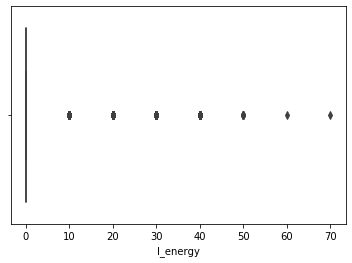

In [9]:
lights_box = sns.boxplot(df1.l_energy)

In [0]:
l = [0, 10, 20, 30, 40, 50, 60, 70]

In [0]:
counts = []

In [0]:
for i in l:
    a = (df1.l_energy == i).sum()
    counts.append(a)


In [13]:
counts

[15252, 2212, 1624, 559, 77, 9, 1, 1]

Text(0.5, 1.0, 'Distribution of Energy Consumed by Lights')

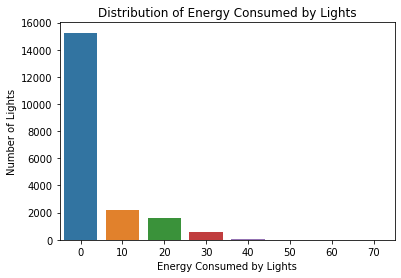

In [14]:
lights = sns.barplot(x = l, y = counts)
lights.set_xlabel('Energy Consumed by Lights')
lights.set_ylabel('Number of Lights')
lights.set_title('Distribution of Energy Consumed by Lights')


In [15]:
((df1.l_energy == 0).sum() / (df1.shape[0])) * 100

77.28401317456296

In [0]:
new_data = df1

In [0]:
new_data.drop(['l_energy'], axis = 1, inplace = True)

In [18]:
new_data.head()

,date_time,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


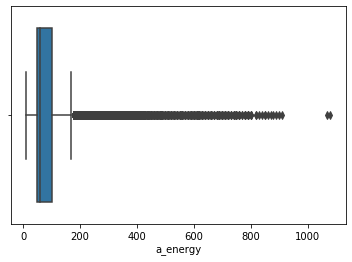

In [19]:
app_box = sns.boxplot(new_data.a_energy)

In [20]:
out = (new_data['a_energy'] > 200).sum()
out


1916

In [21]:
(out/19735) * 100

9.708639473017481

In [22]:
out_e = (new_data['a_energy'] > 950).sum()
out_e


2

In [23]:
(out_e/19735) * 100

0.010134279199391943

In [0]:
energy = new_data[(new_data['a_energy'] <= 200)]

In [25]:
energy.describe()

,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
count,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000,17819.000000
mean,68.728324,21.687676,40.158323,20.294921,40.470961,22.230049,39.167393,20.858577,38.991000,19.607705,50.987044,7.764725,54.917044,20.277619,35.435410,22.046567,43.019409,19.502262,41.556127,7.315671,755.559383,80.236718,3.975014,38.306600,3.762120,25.002765,25.002765
std,31.378141,1.605252,3.933742,2.172435,4.062130,1.971209,3.223465,2.048053,4.324842,1.838655,9.009473,6.031990,30.746291,2.102188,5.085182,1.963094,5.204613,2.011673,4.164766,5.290522,7.345043,14.771215,2.448213,11.951954,4.186178,14.519549,14.519549
min,10.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,15.330000,29.815000,-6.065000,1.000000,15.390000,23.290000,16.306667,29.600000,14.890000,29.166667,-5.000000,729.366667,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,20.760000,37.260000,18.790000,37.930000,20.790000,36.826667,19.566667,35.500000,18.290000,45.400000,3.500000,31.145000,18.700000,31.556905,20.823333,39.200000,18.066667,38.530000,3.533333,751.000000,71.166667,2.000000,29.000000,0.933333,12.461009,12.461009
50%,60.000000,21.600000,39.560000,19.926667,40.560000,22.100000,38.471429,20.666667,38.363333,19.390000,49.090000,7.160000,55.290000,20.100000,34.900000,22.150000,42.453889,19.390000,40.863333,6.850000,756.100000,84.333333,3.500000,40.000000,3.433333,24.940753,24.940753
75%,80.000000,22.600000,42.900000,21.472333,43.326667,23.290000,41.590000,22.100000,42.090000,20.600000,53.826667,11.070714,83.060000,21.600000,39.051865,23.390000,46.590000,20.600000,44.296667,10.333333,760.933333,91.845238,5.333333,40.000000,6.550000,37.660263,37.660263
max,200.000000,26.200000,59.633333,29.856667,56.026667,29.200000,49.656667,26.200000,51.000000,25.795000,96.321667,28.290000,99.900000,25.890000,51.400000,27.230000,58.780000,24.500000,53.326667,26.100000,772.283333,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [0]:
new_en = energy

In [0]:
new_en['date_time'] = pd.to_datetime(new_en.date_time, format = '%Y-%m-%d %H:%M:%S')

In [28]:
new_en.head()

,date_time,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [0]:
new_en.insert(loc = 1, column = 'month', value = new_en.date_time.dt.month)

In [0]:
new_en.insert(loc = 2, column = 'day', value = (new_en.date_time.dt.dayofweek)+1)

In [31]:
new_en.head()

,date_time,month,day,a_energy,kitchen_temp,kitchen_hum,liv_temp,liv_hum,laun_temp,laun_hum,off_temp,off_hum,bath_temp,bath_hum,out_b_temp,out_b_hum,iron_temp,iron_hum,teen_temp,teen_hum,par_temp,par_hum,out_temp,out_press,out_hum,wind,visibility,dew_point,rv1,rv2
0,2016-01-11 17:00:00,1,1,60,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,17.166667,55.20,7.026667,84.256667,17.200000,41.626667,18.2,48.900000,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,1,1,60,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,17.166667,55.20,6.833333,84.063333,17.200000,41.560000,18.2,48.863333,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,1,1,50,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,17.166667,55.09,6.560000,83.156667,17.200000,41.433333,18.2,48.730000,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,1,1,50,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,17.166667,55.09,6.433333,83.423333,17.133333,41.290000,18.1,48.590000,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,1,1,60,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,17.200000,55.09,6.366667,84.893333,17.200000,41.230000,18.1,48.590000,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [0]:
import plotly.graph_objs as go

In [0]:
app_date = go.Scatter(x = new_en.date_time,  mode = "lines", y = new_en.a_energy)

In [0]:
layout = go.Layout(title = 'Appliance Energy Consumed by Date', xaxis = dict(title='Date'), yaxis = dict(title='Wh'))

In [0]:
fig = go.Figure(data = [app_date], layout = layout)

In [37]:
fig.show()

In [0]:
app_mon = new_en.groupby(by = ['month'], as_index = False)['a_energy'].sum()

In [39]:
app_mon

,month,a_energy
0,1,150060
1,2,258270
2,3,283190
3,4,274030
4,5,259120


In [40]:
app_mon.sort_values(by = 'a_energy', ascending = False).head()

,month,a_energy
2,3,283190
3,4,274030
4,5,259120
1,2,258270
0,1,150060


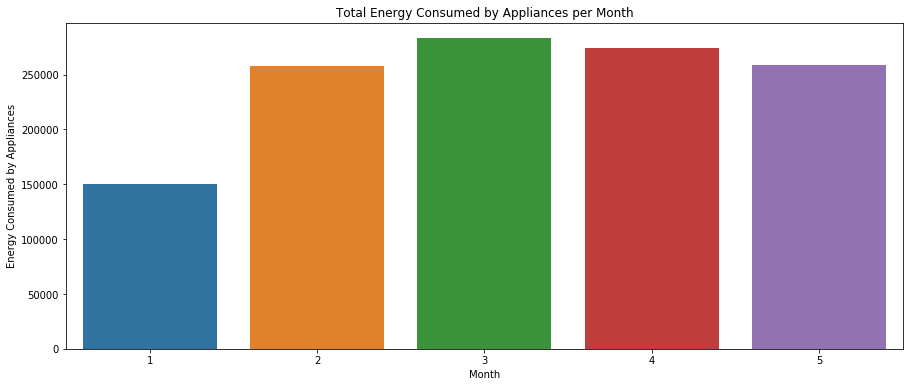

In [44]:
plt.subplots(figsize = (15, 6))
am = sns.barplot(app_mon.month, app_mon.a_energy)
plt.xlabel('Month')
plt.ylabel('Energy Consumed by Appliances')
plt.title('Total Energy Consumed by Appliances per Month')
plt.show()

In [45]:
app_day = new_en.groupby(by = ['day'], as_index = False)['a_energy'].sum()
app_day

,day,a_energy
0,1,161190
1,2,175930
2,3,191700
3,4,177830
4,5,161170
5,6,173640
6,7,183210


In [46]:
app_day.sort_values(by = 'a_energy', ascending = False)

,day,a_energy
2,3,191700
6,7,183210
3,4,177830
1,2,175930
5,6,173640
0,1,161190
4,5,161170


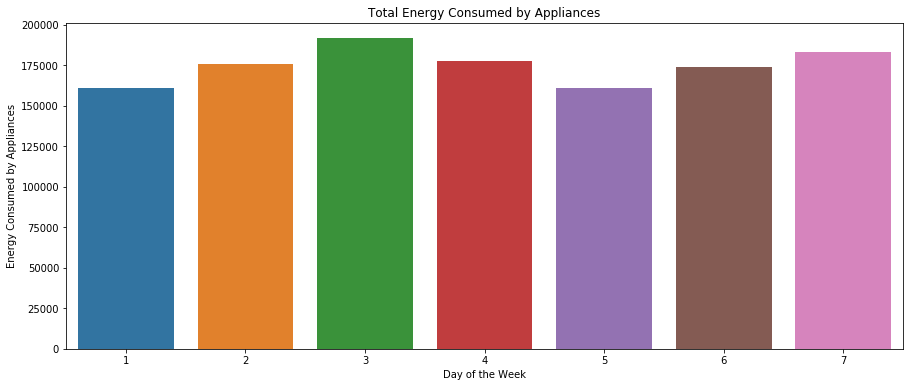

In [47]:
plt.subplots(figsize = (15, 6))
ad = sns.barplot(app_day.day, app_day.a_energy)
plt.xlabel('Day of the Week')
plt.ylabel('Energy Consumed by Appliances')
plt.title('Total Energy Consumed by Appliances')
plt.show()

In [0]:
col_temp = ['kitchen_temp', 'liv_temp', 'laun_temp', 'off_temp', 
'bath_temp', 'out_b_temp', 'iron_temp', 'teen_temp', 'par_temp']


In [0]:
temp = new_en[col_temp]

In [50]:
temp.head()

,kitchen_temp,liv_temp,laun_temp,off_temp,bath_temp,out_b_temp,iron_temp,teen_temp,par_temp
0,19.89,19.2,19.79,19.000000,17.166667,7.026667,17.200000,18.2,17.033333
1,19.89,19.2,19.79,19.000000,17.166667,6.833333,17.200000,18.2,17.066667
2,19.89,19.2,19.79,18.926667,17.166667,6.560000,17.200000,18.2,17.000000
3,19.89,19.2,19.79,18.890000,17.166667,6.433333,17.133333,18.1,17.000000
4,19.89,19.2,19.79,18.890000,17.200000,6.366667,17.200000,18.1,17.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0d9b77b8>,
      dtype=object)

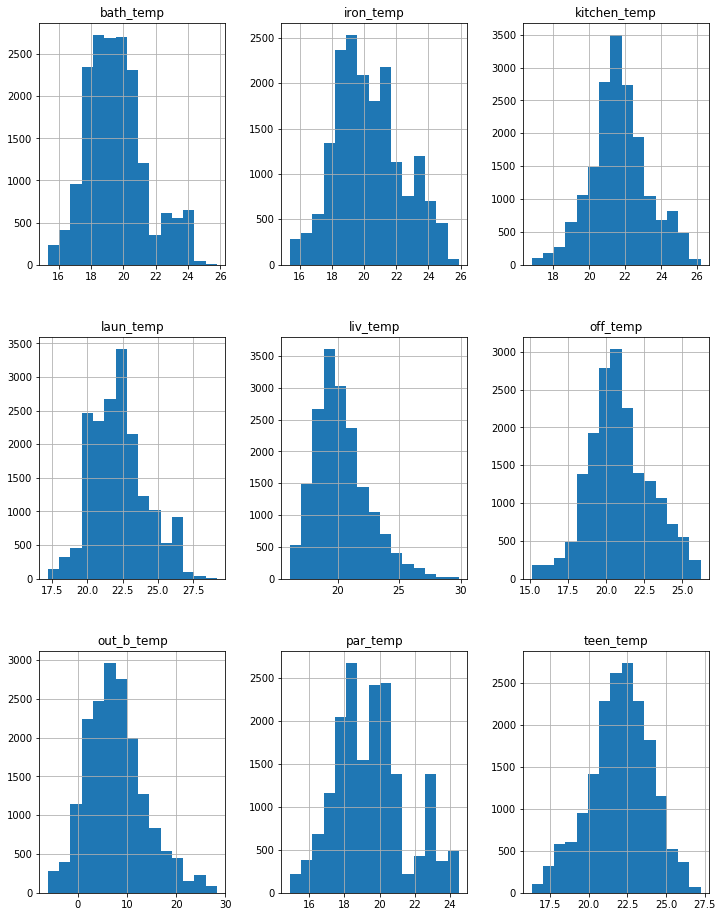

In [51]:
temp.hist(bins = 15, figsize = (12, 16))

In [0]:
col_hum = ['kitchen_hum', 'liv_hum', 'laun_hum', 'off_hum', 'bath_hum', 'out_b_hum', 'iron_hum', 'teen_hum', 'par_hum']

In [0]:
hum = new_en[col_hum]

In [54]:
hum.head()

,kitchen_hum,liv_hum,laun_hum,off_hum,bath_hum,out_b_hum,iron_hum,teen_hum,par_hum
0,47.596667,44.790000,44.730000,45.566667,55.20,84.256667,41.626667,48.900000,45.53
1,46.693333,44.722500,44.790000,45.992500,55.20,84.063333,41.560000,48.863333,45.56
2,46.300000,44.626667,44.933333,45.890000,55.09,83.156667,41.433333,48.730000,45.50
3,46.066667,44.590000,45.000000,45.723333,55.09,83.423333,41.290000,48.590000,45.40
4,46.333333,44.530000,45.000000,45.530000,55.09,84.893333,41.230000,48.590000,45.40


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0bbdc358>,
      dtype=object)

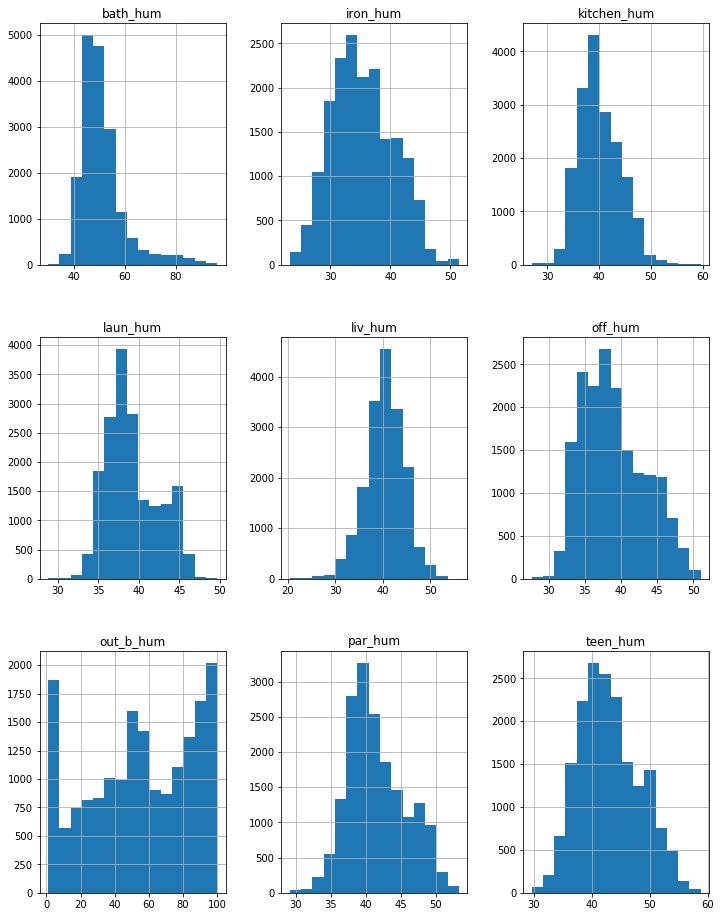

In [55]:
hum.hist(bins = 15, figsize = (12, 16))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9d0b70ab00>,
      dtype=object)

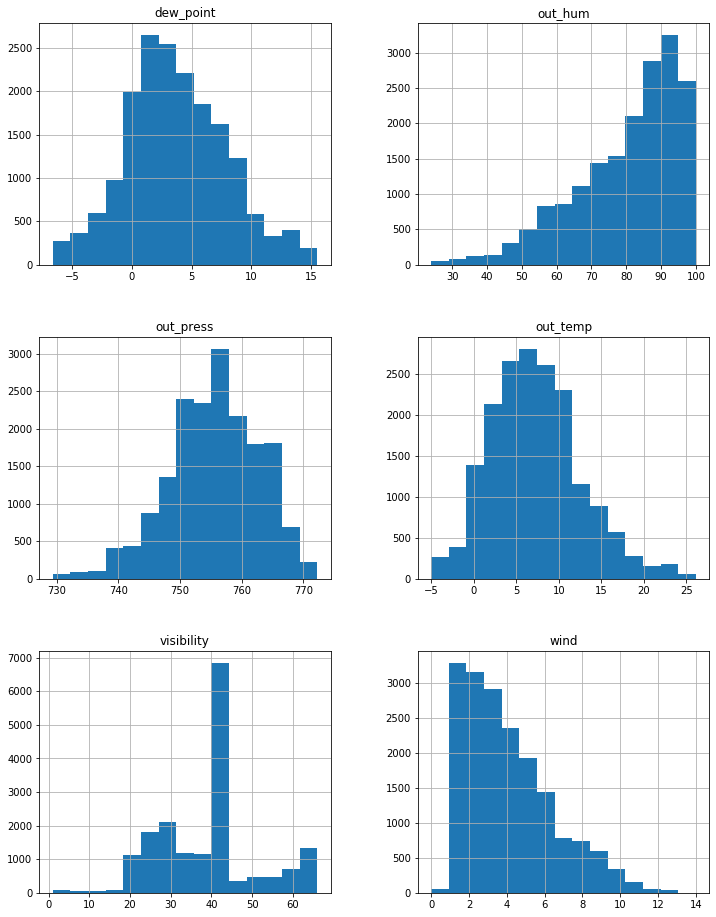

In [56]:
col_weather = ["out_temp", "dew_point", "out_hum", "out_press",
                "wind", "visibility"] 
weath = new_en[col_weather]
weath.head()
weath.hist(bins = 15, figsize = (12, 16))

**Exercise 9.06: Plotting out_b, out_hum, visibility, and wind**

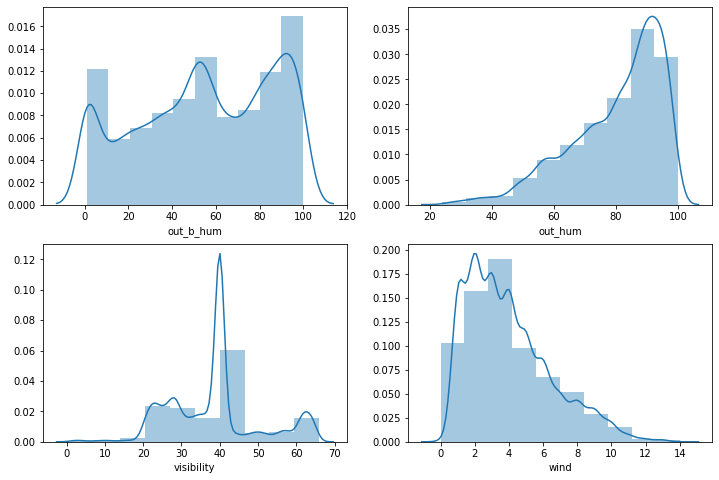

In [58]:
f, ax = plt.subplots(2, 2, figsize = (12, 8))
obh = sns.distplot(hum["out_b_hum"], bins = 10, ax = ax[0][0])
oh = sns.distplot(weath["out_hum"], bins = 10, ax = ax[0][1])
vis = sns.distplot(weath["visibility"], bins = 10, ax = ax[1][0])
wind = sns.distplot(weath["wind"], bins = 10, ax = ax[1][1])


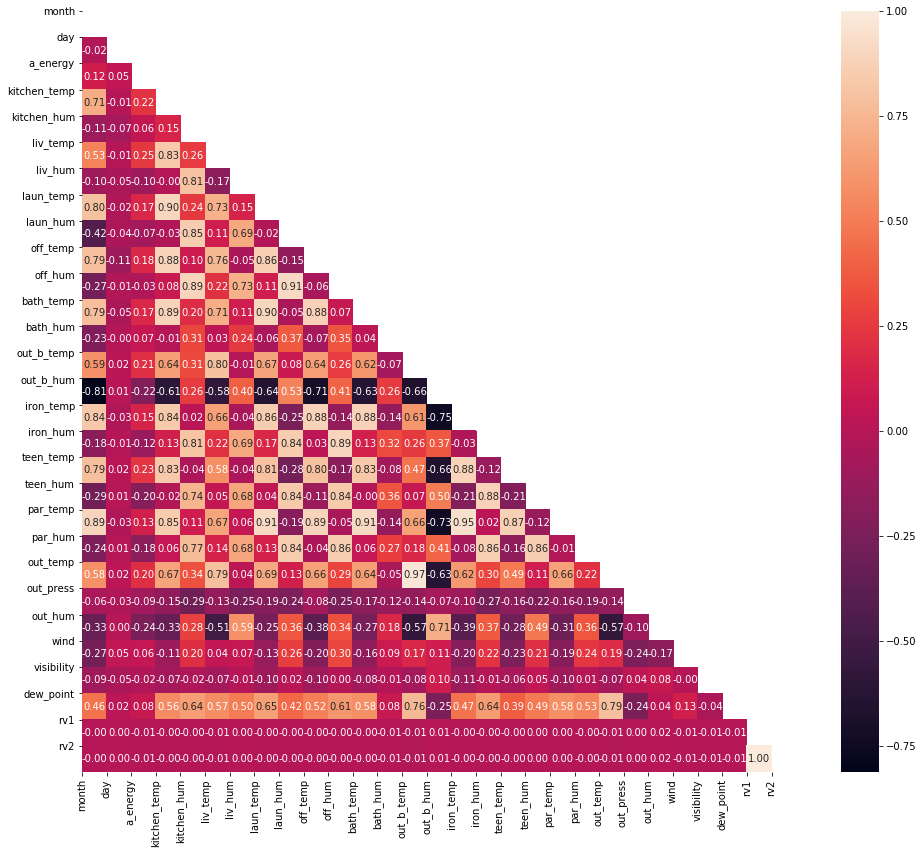

In [60]:
corr = new_en.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
f, ax = plt.subplots(figsize=(16, 14))
sns.heatmap(corr, annot = True, fmt = ".2f", mask = mask)
plt.xticks(range(len(corr.columns)), corr.columns)
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()